In [1]:
import pandas as pd

data = {'Nome': ['André Solér', 'Eduardo Gomes', 'Gustavo Lopes', 'Leonardo Bonin'], 'RM': ['98827', '97919', '98887', '551716']}
equipe = pd.DataFrame(data)
equipe

,Nome,RM
0,André Solér,98827
1,Eduardo Gomes,97919
2,Gustavo Lopes,98887
3,Leonardo Bonin,551716


In [2]:
from ftplib import FTP
import io

def conectar_ftp_e_ler_json(ftp_host, ftp_user, ftp_pass, filename):
  ftp = FTP()
  ftp.connect(ftp_host)
  ftp.login(ftp_user, ftp_pass)

  with io.BytesIO() as file_data:
      ftp.retrbinary(f"RETR {filename}", file_data.write)
      file_data.seek(0)
      arquivo = pd.read_json(file_data)

  df = pd.DataFrame(arquivo)
  ftp.quit()
  return df

ftp_host = '186.226.57.59'
ftp_user = 'adminorleansturcom'
ftp_pass = 'Orleans@2024!'
filename = 'database.json'

df = conectar_ftp_e_ler_json(ftp_host, ftp_user, ftp_pass, filename)
df_sorted = df.sort_values('Jogador')
df_sorted

,Jogador,Modo de Jogo,Nome da Prova,Dificuldade da Sessão,Pontuação Total,Pontuação Mão Esquerda,Pontuação Mão Direita,Pontuação Pinça: Pegador,Pontuação Pinça: Tesoura,Tempo Médio de Exercícios: Dificuldade 1,Tempo Médio de Exercícios: Dificuldade 2,Tempo Médio de Exercícios: Dificuldade 3
0,Eduardo,Arcade,-,Média,69.50,25,84,71,98,9,7,5
1,Eduardo,Desafio,-,-,61.75,86,61,62,38,7,2,7
2,Eduardo,Prova,30 char,-,69.50,57,74,91,56,5,6,8
6,Gustavo,Arcade,-,Fácil,89.25,83,96,79,99,7,6,2
7,Gustavo,Desafio,-,-,45.00,47,60,26,47,3,2,9
8,Gustavo,Prova,30 char,-,79.50,97,61,72,88,9,4,6
3,Leonardo,Arcade,-,Difícil,69.25,93,83,57,44,4,9,9
4,Leonardo,Desafio,-,-,71.75,78,87,55,67,6,2,4
5,Leonardo,Prova,30 char,-,72.50,30,82,79,99,6,6,6


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x600 with 0 Axes>

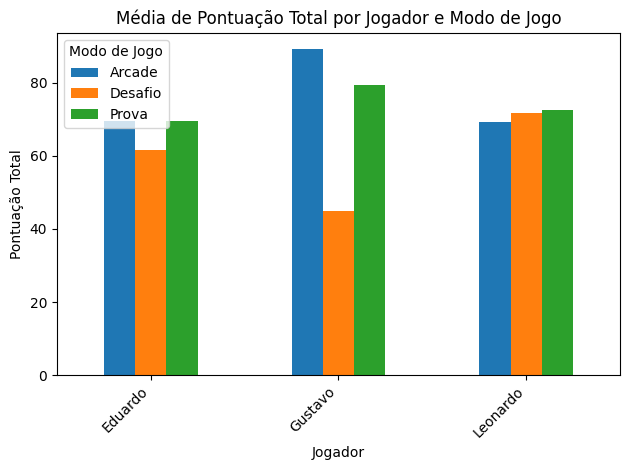

<Figure size 1200x600 with 0 Axes>

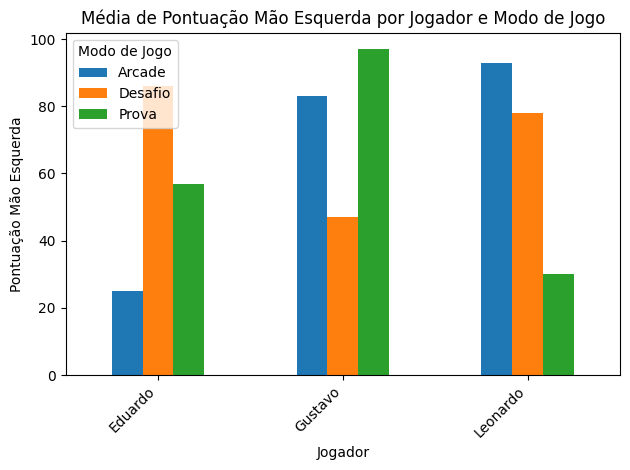

<Figure size 1200x600 with 0 Axes>

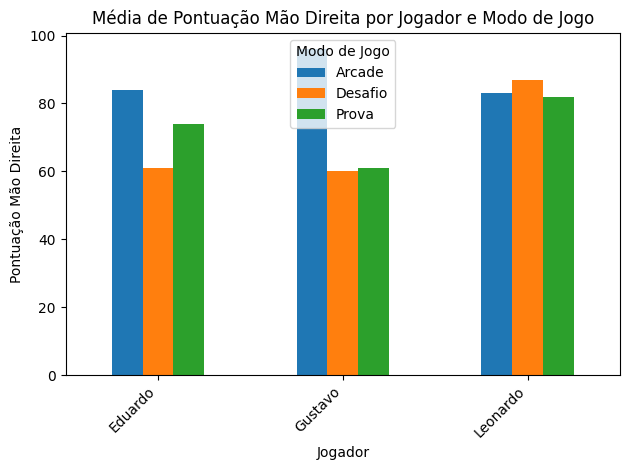

<Figure size 1200x600 with 0 Axes>

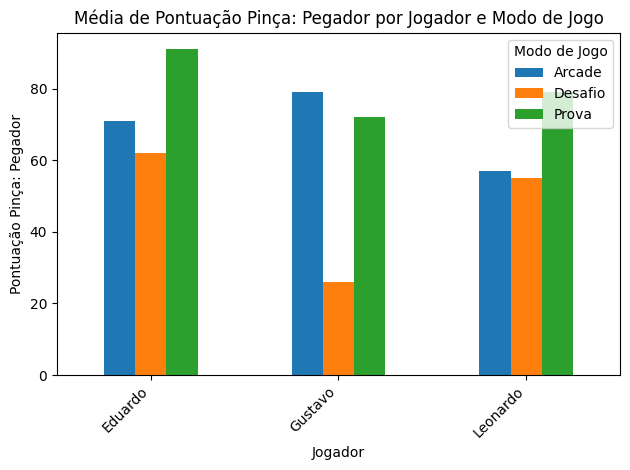

<Figure size 1200x600 with 0 Axes>

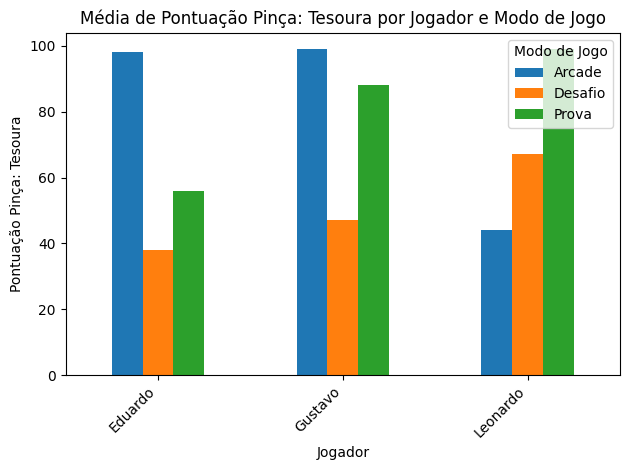

In [4]:
import matplotlib.pyplot as plt

def plotar_graficos_jogadores(df):
  for coluna in ['Pontuação Total', 'Pontuação Mão Esquerda', 'Pontuação Mão Direita', 'Pontuação Pinça: Pegador', 'Pontuação Pinça: Tesoura']:
    plt.figure(figsize=(12, 6))

    grouped = df_sorted.groupby(['Jogador', 'Modo de Jogo'])[coluna].mean()

    grouped.unstack().plot(kind='bar')

    plt.title(f'Média de {coluna} por Jogador e Modo de Jogo')
    plt.xlabel('Jogador')
    plt.ylabel(coluna)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')


plotar_graficos_jogadores(df)

<Figure size 1200x600 with 0 Axes>

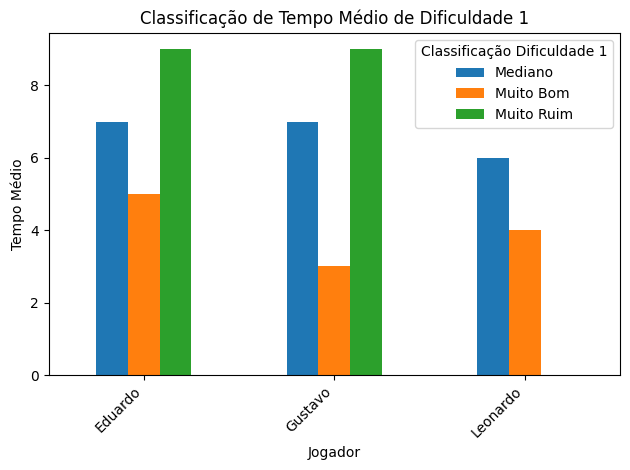

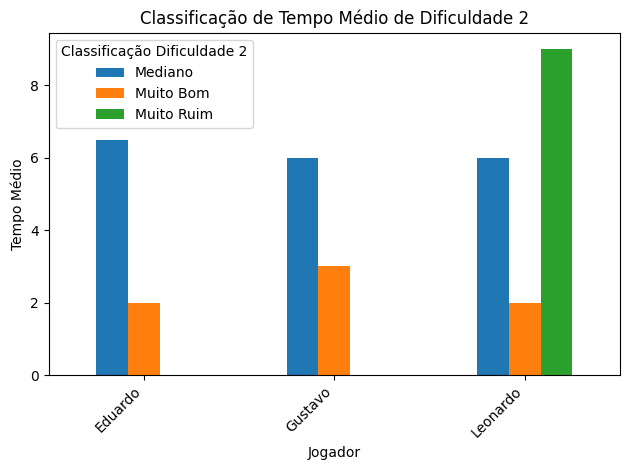

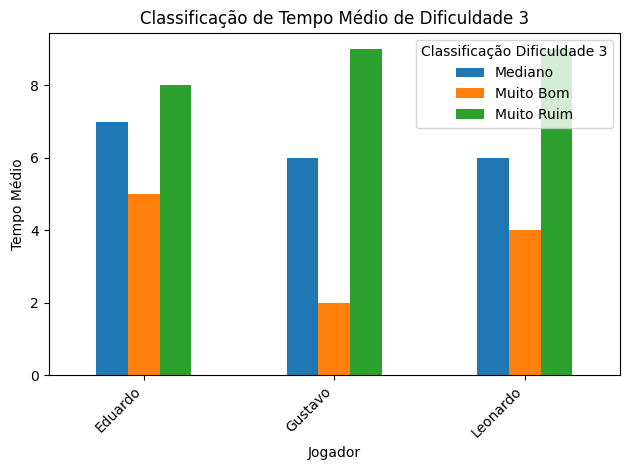

In [5]:
import matplotlib.pyplot as plt

def classificar_tempo(tempo):
  if tempo < 6:
    return "Muito Bom"
  elif 6 <= tempo <= 7:
    return "Mediano"
  else:
    return "Muito Ruim"

def plotar_grafico_tempos(df):
  plt.figure(figsize=(12, 6))

  for dificuldade in [1, 2, 3]:
    coluna = f"Tempo Médio de Exercícios: Dificuldade {dificuldade}"
    if coluna in df.columns:
      df[f'Classificação Dificuldade {dificuldade}'] = df[coluna].apply(classificar_tempo)

      grouped = df.groupby(['Jogador', f'Classificação Dificuldade {dificuldade}'])[coluna].mean()

      grouped.unstack().plot(kind='bar')

      plt.title(f'Classificação de Tempo Médio de Dificuldade {dificuldade}')
      plt.xlabel('Jogador')
      plt.ylabel('Tempo Médio')
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()
      print('\n')


plotar_grafico_tempos(df)